In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Load the CSV file
data = pd.read_csv('single.csv')
baseline_data = pd.read_csv('baseline.csv')

# Separate data by tile size
tile_sizes = data['Tile Size'].unique()

baseline_bleu = baseline_data['BLEU Score'][0]

baseline_fscore = baseline_data['Character Fscore'][0]


In [32]:
baseline_bleu

41.337328250540224

In [31]:
baseline_fscore

0.2646672440784473

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_71196/2704063823.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(tile_sizes))


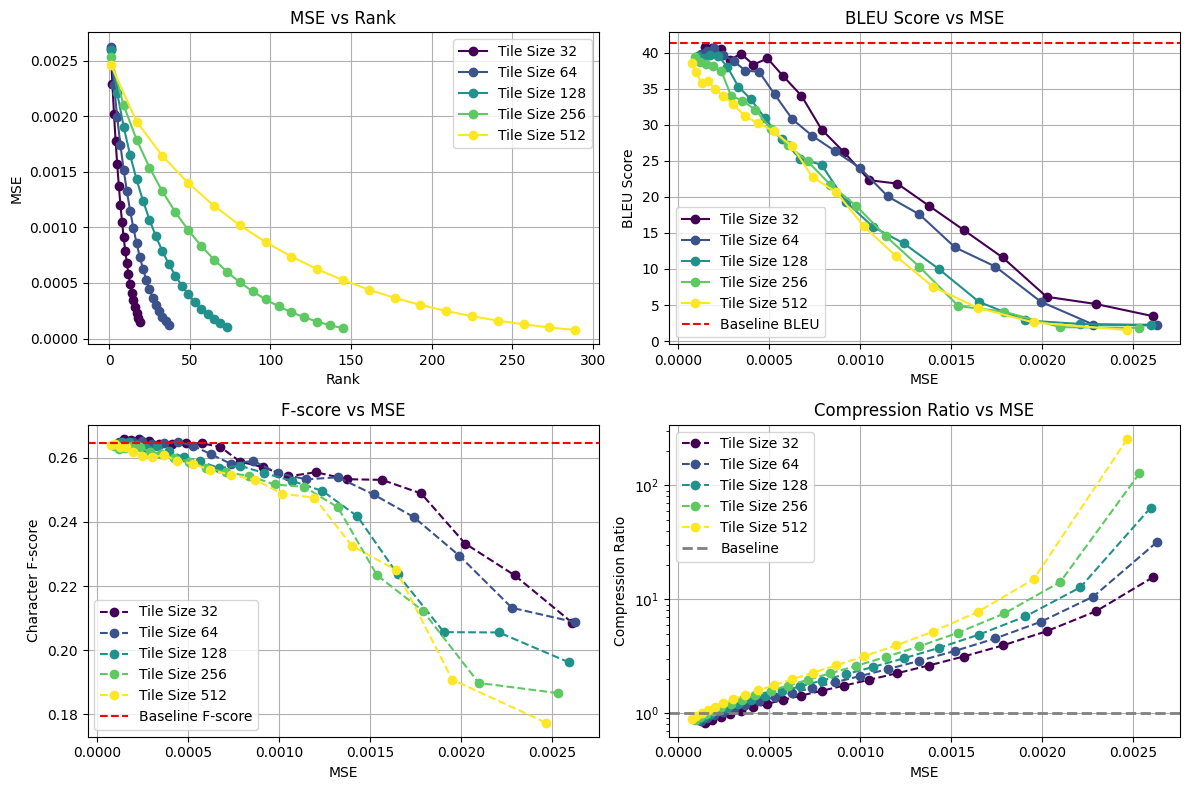

In [49]:

# Set up the plots
plt.figure(figsize=(12,8))

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(tile_sizes))

# Plot BLEU Score against MSE
plt.subplot(2, 2, 1)
for i, tile_size in enumerate(tile_sizes):
    subset = data[data['Tile Size'] == tile_size]
    plt.plot(
        subset['Steps'], 
        subset['MSE'], 
        marker='o', 
        linestyle='-', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )

plt.xlabel('Rank')
plt.ylabel('MSE')
plt.title('MSE vs Rank')
plt.grid(True)
plt.legend()

# Plot BLEU Score against MSE
plt.subplot(2, 2, 2)
for i, tile_size in enumerate(tile_sizes):
    subset = data[data['Tile Size'] == tile_size]
    plt.plot(
        subset['MSE'], 
        subset['BLEU Score'], 
        marker='o', 
        linestyle='-', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )
plt.axhline(y=baseline_bleu, color='red', linestyle='--',label='Baseline BLEU')
plt.xlabel('MSE')
plt.ylabel('BLEU Score')
plt.title('BLEU Score vs MSE')
plt.grid(True)
plt.legend()

# Plot F-score against MSE
plt.subplot(2, 2, 3)
for i, tile_size in enumerate(tile_sizes):
    subset = data[data['Tile Size'] == tile_size]
    plt.plot(
        subset['MSE'], 
        subset['Character F-score'], 
        marker='o', 
        linestyle='--', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )
plt.axhline(y=baseline_fscore, color='red', linestyle='--',label='Baseline F-score')
plt.xlabel('MSE')
plt.ylabel('Character F-score')
plt.title('F-score vs MSE')
plt.grid(True)
plt.legend()

# Plot Compression Ratio against MSE
plt.subplot(2, 2, 4)
for i, tile_size in enumerate(tile_sizes):
    subset = data[data['Tile Size'] == tile_size]
    plt.plot(
        subset['MSE'], 
        subset['Compression Ratio'], 
        marker='o', 
        linestyle='--', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )
    
plt.xlabel('MSE')
plt.axhline(y=1, color='gray', linestyle='--',linewidth=2,label='Baseline')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs MSE')
plt.yscale('log') 
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_71196/2893942591.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(tile_sizes))


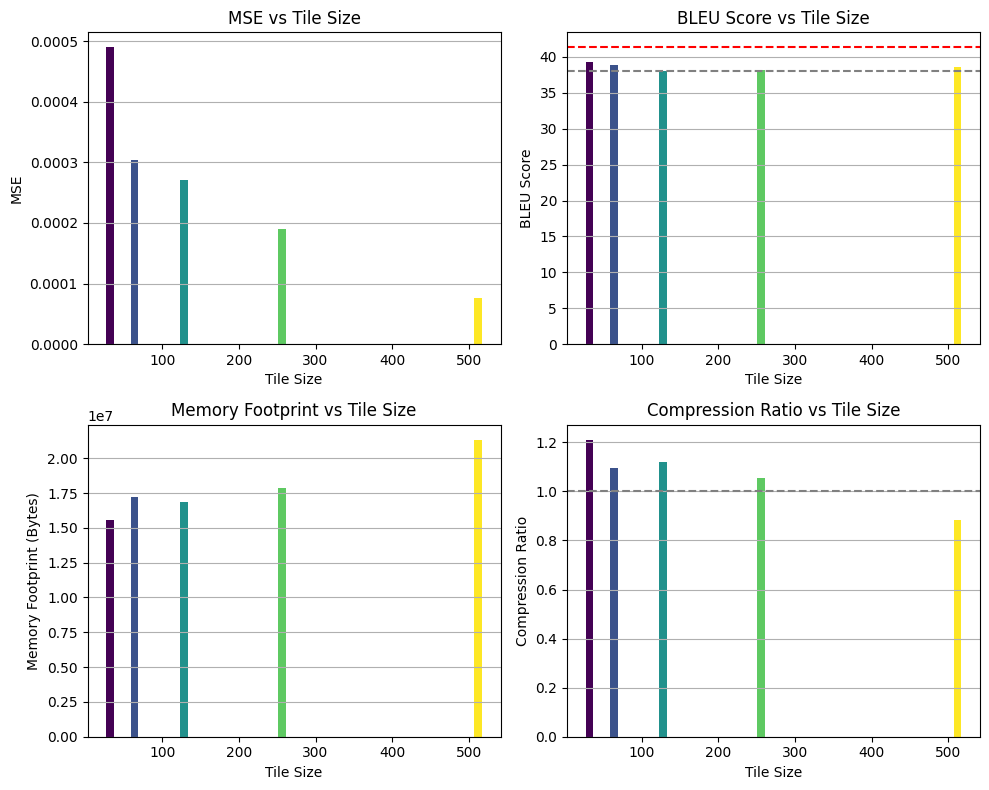

In [93]:

# Define BLEU Score threshold
bleu_threshold = 38

# Separate data by tile size
tile_sizes = data['Tile Size'].unique()

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(tile_sizes))

# Initialize lists to store data points for plotting
tile_size_values = []
mse_values = []
bleu_values = []
memory_footprint_values = []
compression_ratio_values = []

# Iterate over each tile size
for i, tile_size in enumerate(tile_sizes):
    # Filter the subset based on the tile size and BLEU Score threshold
    subset = data[(data['Tile Size'] == tile_size) & (data['BLEU Score'] > bleu_threshold)]
    
    # Check if there is any data meeting the condition
    if not subset.empty:
        # Select the first entry that satisfies the BLEU threshold
        first_entry = subset.iloc[0]
        
        # Store values for plotting
        tile_size_values.append(tile_size)
        mse_values.append(first_entry['MSE'])
        bleu_values.append(first_entry['BLEU Score'])
        memory_footprint_values.append(first_entry['Memory Footprint (Bytes)'])
        compression_ratio_values.append(first_entry['Compression Ratio'])

# Set up the plots
plt.figure(figsize=(10,8))

# Colors for the bars using the Viridis colormap
colors = [viridis(i / len(tile_size_values)) for i in range(len(tile_size_values))]

# Plot MSE against Tile Size using a bar plot
plt.subplot(2, 2, 1)
bars = plt.bar(tile_size_values, mse_values, color=colors, width=10)
plt.xlabel('Tile Size')
plt.ylabel('MSE')
plt.title('MSE vs Tile Size')
plt.grid(axis='y')

# Plot BLEU Score against Tile Size using a bar plot
plt.subplot(2, 2, 2)
bars = plt.bar(tile_size_values, bleu_values, color=colors, width=10)
plt.axhline(y=baseline_bleu, color='red', linestyle='--', label='BLEU Baseline')
plt.axhline(y=bleu_threshold, color='gray', linestyle='--', label='BLEU Threshold')
plt.xlabel('Tile Size')
plt.ylabel('BLEU Score')
plt.title('BLEU Score vs Tile Size')
plt.grid(axis='y')

# Plot Memory Footprint against Tile Size using a bar plot
plt.subplot(2, 2, 3)
bars = plt.bar(tile_size_values, memory_footprint_values, color=colors, width=10)
plt.xlabel('Tile Size')
plt.ylabel('Memory Footprint (Bytes)')
plt.title('Memory Footprint vs Tile Size')
plt.grid(axis='y')

# Plot Compression Ratio against Tile Size using a bar plot
plt.subplot(2, 2, 4)
bars = plt.bar(tile_size_values, compression_ratio_values, color=colors, width=10)
plt.axhline(y=1, color='gray', linestyle='--', label='Unit Compression Ratio')
plt.xlabel('Tile Size')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs Tile Size')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_71196/680965645.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(tile_sizes))


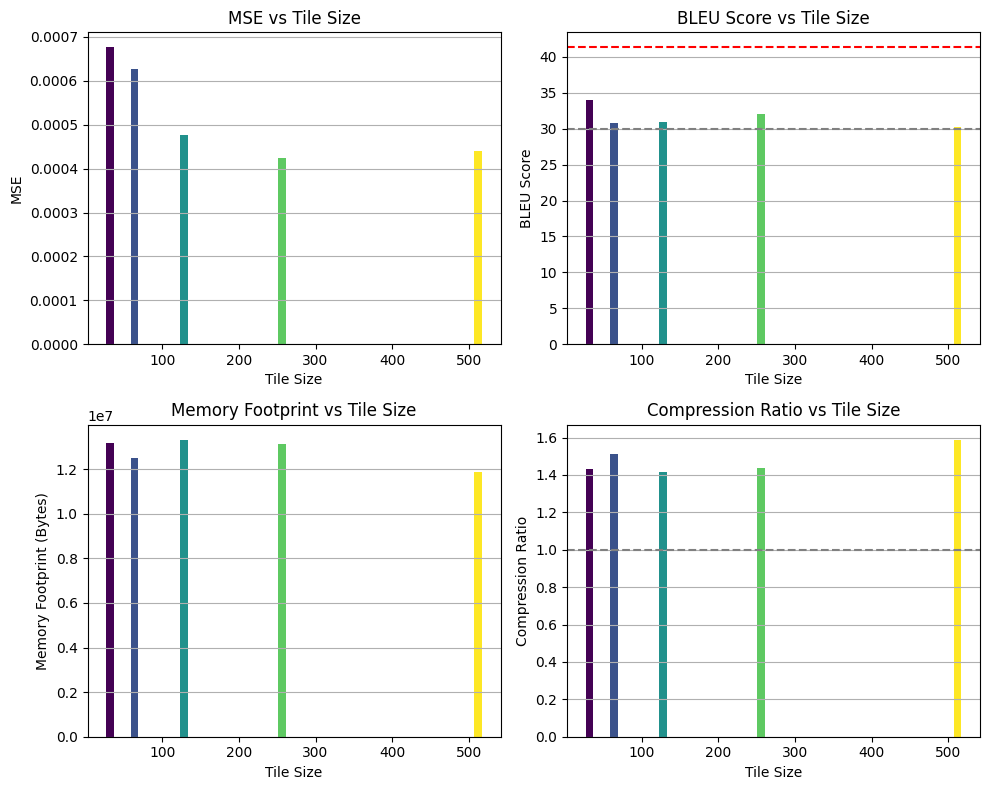

In [95]:

# Define BLEU Score threshold
bleu_threshold = 30

# Separate data by tile size
tile_sizes = data['Tile Size'].unique()

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(tile_sizes))

# Initialize lists to store data points for plotting
tile_size_values = []
mse_values = []
bleu_values = []
memory_footprint_values = []
compression_ratio_values = []

# Iterate over each tile size
for i, tile_size in enumerate(tile_sizes):
    # Filter the subset based on the tile size and BLEU Score threshold
    subset = data[(data['Tile Size'] == tile_size) & (data['BLEU Score'] > bleu_threshold)]
    
    # Check if there is any data meeting the condition
    if not subset.empty:
        # Select the first entry that satisfies the BLEU threshold
        first_entry = subset.iloc[0]
        
        # Store values for plotting
        tile_size_values.append(tile_size)
        mse_values.append(first_entry['MSE'])
        bleu_values.append(first_entry['BLEU Score'])
        memory_footprint_values.append(first_entry['Memory Footprint (Bytes)'])
        compression_ratio_values.append(first_entry['Compression Ratio'])

# Set up the plots
plt.figure(figsize=(10,8))

# Colors for the bars using the Viridis colormap
colors = [viridis(i / len(tile_size_values)) for i in range(len(tile_size_values))]

# Plot MSE against Tile Size using a bar plot
plt.subplot(2, 2, 1)
bars = plt.bar(tile_size_values, mse_values, color=colors, width=10)
plt.xlabel('Tile Size')
plt.ylabel('MSE')
plt.title('MSE vs Tile Size')
plt.grid(axis='y')

# Plot BLEU Score against Tile Size using a bar plot
plt.subplot(2, 2, 2)
bars = plt.bar(tile_size_values, bleu_values, color=colors, width=10)
plt.axhline(y=baseline_bleu, color='red', linestyle='--', label='BLEU Baseline')
plt.axhline(y=bleu_threshold, color='gray', linestyle='--', label='BLEU Threshold')
plt.xlabel('Tile Size')
plt.ylabel('BLEU Score')
plt.title('BLEU Score vs Tile Size')
plt.grid(axis='y')

# Plot Memory Footprint against Tile Size using a bar plot
plt.subplot(2, 2, 3)
bars = plt.bar(tile_size_values, memory_footprint_values, color=colors, width=10)
plt.xlabel('Tile Size')
plt.ylabel('Memory Footprint (Bytes)')
plt.title('Memory Footprint vs Tile Size')
plt.grid(axis='y')

# Plot Compression Ratio against Tile Size using a bar plot
plt.subplot(2, 2, 4)
bars = plt.bar(tile_size_values, compression_ratio_values, color=colors, width=10)
plt.axhline(y=1, color='gray', linestyle='--', label='Unit Compression Ratio')
plt.xlabel('Tile Size')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs Tile Size')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_71196/4072461413.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(tile_sizes))


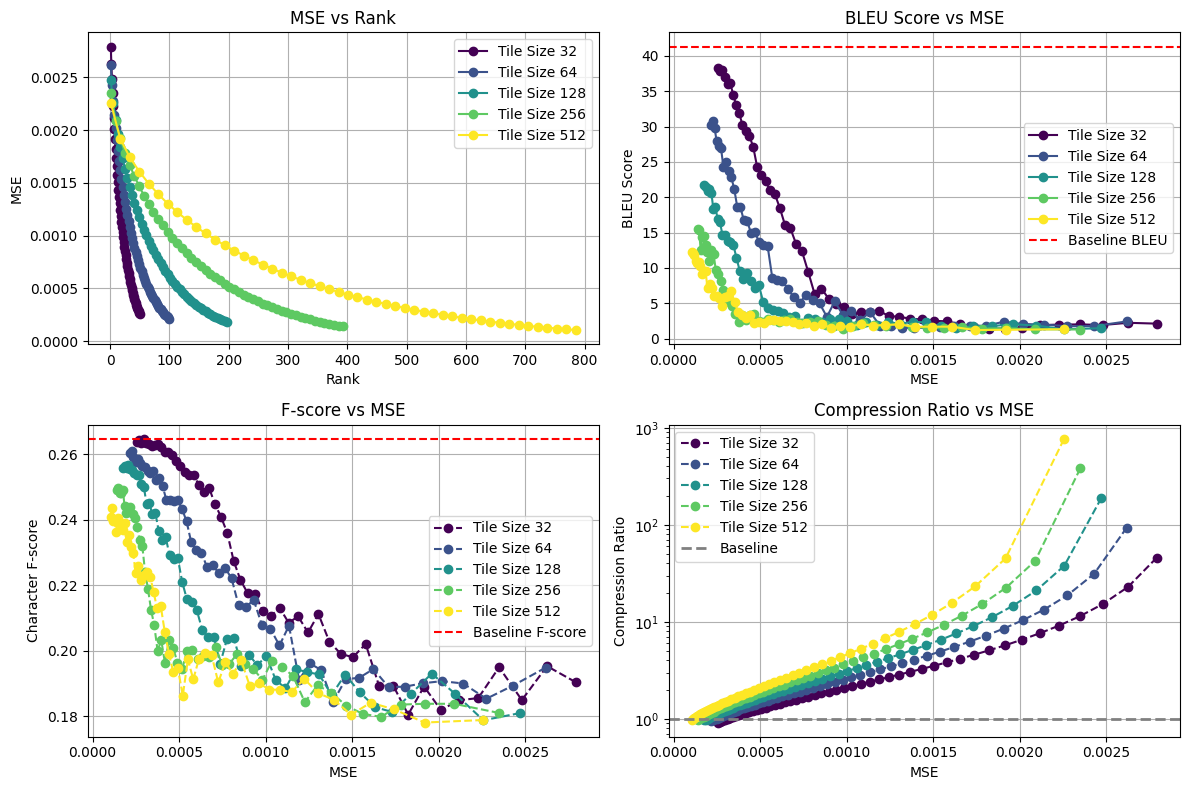

In [98]:
data1 = pd.read_csv('group.csv')


# Set up the plots
plt.figure(figsize=(12,8))

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(tile_sizes))

# Plot BLEU Score against MSE
plt.subplot(2, 2, 1)
for i, tile_size in enumerate(tile_sizes):
    subset = data1[data1['Tile Size'] == tile_size]
    plt.plot(
        subset['Steps'], 
        subset['MSE'], 
        marker='o', 
        linestyle='-', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )

plt.xlabel('Rank')
plt.ylabel('MSE')
plt.title('MSE vs Rank')
plt.grid(True)
plt.legend()

# Plot BLEU Score against MSE
plt.subplot(2, 2, 2)
for i, tile_size in enumerate(tile_sizes):
    subset = data1[data1['Tile Size'] == tile_size]
    plt.plot(
        subset['MSE'], 
        subset['BLEU Score'], 
        marker='o', 
        linestyle='-', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )
plt.axhline(y=baseline_bleu, color='red', linestyle='--',label='Baseline BLEU')
plt.xlabel('MSE')
plt.ylabel('BLEU Score')
plt.title('BLEU Score vs MSE')
plt.grid(True)
plt.legend()

# Plot F-score against MSE
plt.subplot(2, 2, 3)
for i, tile_size in enumerate(tile_sizes):
    subset = data1[data1['Tile Size'] == tile_size]
    plt.plot(
        subset['MSE'], 
        subset['Character F-score'], 
        marker='o', 
        linestyle='--', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )
plt.axhline(y=baseline_fscore, color='red', linestyle='--',label='Baseline F-score')
plt.xlabel('MSE')
plt.ylabel('Character F-score')
plt.title('F-score vs MSE')
plt.grid(True)
plt.legend()

# Plot Compression Ratio against MSE
plt.subplot(2, 2, 4)
for i, tile_size in enumerate(tile_sizes):
    subset = data1[data1['Tile Size'] == tile_size]
    plt.plot(
        subset['MSE'], 
        subset['Compression Ratio'], 
        marker='o', 
        linestyle='--', 
        label=f'Tile Size {tile_size}',
        color=viridis(i / len(tile_sizes))  # Assign colors using the colormap
    )
plt.xlabel('MSE')
plt.axhline(y=1, color='gray', linestyle='--',linewidth=2,label='Baseline')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs MSE')
plt.yscale('log') 
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_71196/2360570033.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 2)


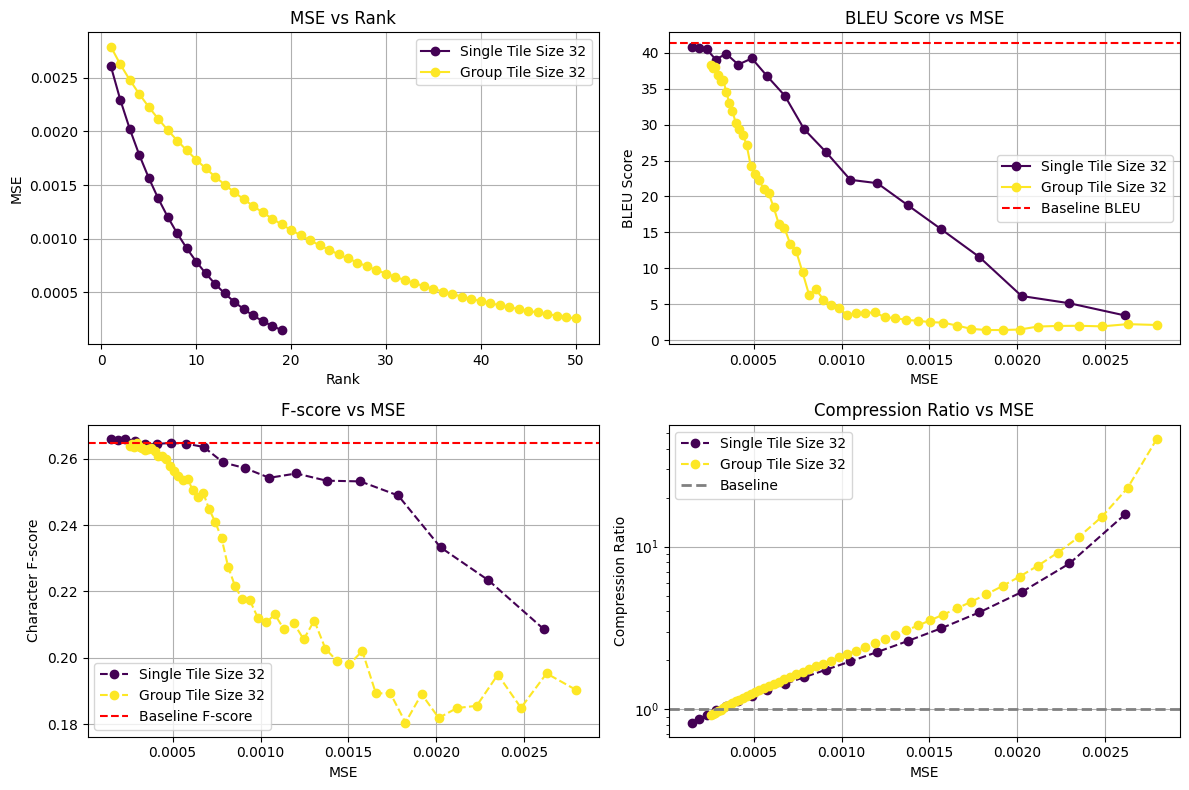

In [101]:
# Set up the plots
plt.figure(figsize=(12,8))

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', 2)

# Plot BLEU Score against MSE
plt.subplot(2, 2, 1)

tile_size = 32

subset = data[data['Tile Size'] == tile_size]
subset1 = data1[data1['Tile Size'] == tile_size]
plt.plot(
    subset['Steps'], 
    subset['MSE'], 
    marker='o', 
    linestyle='-', 
    label=f'Single Tile Size {tile_size}',
    color=viridis(0)  # Assign colors using the colormap
)
plt.plot(
    subset1['Steps'], 
    subset1['MSE'], 
    marker='o', 
    linestyle='-', 
    label=f'Group Tile Size {tile_size}',
    color=viridis(1)  # Assign colors using the colormap
)

plt.xlabel('Rank')
plt.ylabel('MSE')
plt.title('MSE vs Rank')
plt.grid(True)
plt.legend()

# Plot BLEU Score against MSE
plt.subplot(2, 2, 2)

subset = data[data['Tile Size'] == tile_size]
plt.plot(
    subset['MSE'], 
    subset['BLEU Score'], 
    marker='o', 
    linestyle='-', 
    label=f'Single Tile Size {tile_size}',
    color=viridis(0)  # Assign colors using the colormap
)
plt.plot(
    subset1['MSE'], 
    subset1['BLEU Score'], 
    marker='o', 
    linestyle='-', 
    label=f'Group Tile Size {tile_size}',
    color=viridis(1)  # Assign colors using the colormap
)
plt.axhline(y=baseline_bleu, color='red', linestyle='--',label='Baseline BLEU')
plt.xlabel('MSE')
plt.ylabel('BLEU Score')
plt.title('BLEU Score vs MSE')
plt.grid(True)
plt.legend()

# Plot F-score against MSE
plt.subplot(2, 2, 3)

subset = data[data['Tile Size'] == tile_size]
plt.plot(
    subset['MSE'], 
    subset['Character F-score'], 
    marker='o', 
    linestyle='--', 
    label=f'Single Tile Size {tile_size}',
    color=viridis(0)  # Assign colors using the colormap
)
plt.plot(
    subset1['MSE'], 
    subset1['Character F-score'], 
    marker='o', 
    linestyle='--', 
    label=f'Group Tile Size {tile_size}',
    color=viridis(1)  # Assign colors using the colormap
)
plt.axhline(y=baseline_fscore, color='red', linestyle='--',label='Baseline F-score')
plt.xlabel('MSE')
plt.ylabel('Character F-score')
plt.title('F-score vs MSE')
plt.grid(True)
plt.legend()

# Plot Compression Ratio against MSE
plt.subplot(2, 2, 4)

subset = data[data['Tile Size'] == tile_size]
plt.plot(
    subset['MSE'], 
    subset['Compression Ratio'], 
    marker='o', 
    linestyle='--', 
    label=f'Single Tile Size {tile_size}',
    color=viridis(0)  # Assign colors using the colormap
)
plt.plot(
    subset1['MSE'], 
    subset1['Compression Ratio'], 
    marker='o', 
    linestyle='--', 
    label=f'Group Tile Size {tile_size}',
    color=viridis(1)  # Assign colors using the colormap
)
    
plt.xlabel('MSE')
plt.axhline(y=1, color='gray', linestyle='--',linewidth=2,label='Baseline')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs MSE')
plt.yscale('log') 
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Define BLEU Score threshold
bleu_threshold = 30

# Separate data by tile size
tile_sizes = data['Tile Size'].unique()

# Generate a colormap with Viridis
viridis = cm.get_cmap('viridis', len(tile_sizes))

# Initialize lists to store data points for plotting
tile_size_values = []
mse_values = []
bleu_values = []
memory_footprint_values = []
compression_ratio_values = []

# Iterate over each tile size
for i, tile_size in enumerate(tile_sizes):
    # Filter the subset based on the tile size and BLEU Score threshold
    subset = data[(data['Tile Size'] == tile_size) & (data['BLEU Score'] > bleu_threshold)]
    
    # Check if there is any data meeting the condition
    if not subset.empty:
        # Select the first entry that satisfies the BLEU threshold
        first_entry = subset.iloc[0]
        
        # Store values for plotting
        tile_size_values.append(tile_size)
        mse_values.append(first_entry['MSE'])
        bleu_values.append(first_entry['BLEU Score'])
        memory_footprint_values.append(first_entry['Memory Footprint (Bytes)'])
        compression_ratio_values.append(first_entry['Compression Ratio'])

# Set up the plots
plt.figure(figsize=(10,8))

# Colors for the bars using the Viridis colormap
colors = [viridis(i / len(tile_size_values)) for i in range(len(tile_size_values))]

# Plot MSE against Tile Size using a bar plot
plt.subplot(2, 2, 1)
bars = plt.bar(tile_size_values, mse_values, color=colors, width=10)
plt.xlabel('Tile Size')
plt.ylabel('MSE')
plt.title('MSE vs Tile Size')
plt.grid(axis='y')

# Plot BLEU Score against Tile Size using a bar plot
plt.subplot(2, 2, 2)
bars = plt.bar(tile_size_values, bleu_values, color=colors, width=10)
plt.axhline(y=baseline_bleu, color='red', linestyle='--', label='BLEU Baseline')
plt.axhline(y=bleu_threshold, color='gray', linestyle='--', label='BLEU Threshold')
plt.xlabel('Tile Size')
plt.ylabel('BLEU Score')
plt.title('BLEU Score vs Tile Size')
plt.grid(axis='y')

# Plot Memory Footprint against Tile Size using a bar plot
plt.subplot(2, 2, 3)
bars = plt.bar(tile_size_values, memory_footprint_values, color=colors, width=10)
plt.xlabel('Tile Size')
plt.ylabel('Memory Footprint (Bytes)')
plt.title('Memory Footprint vs Tile Size')
plt.grid(axis='y')

# Plot Compression Ratio against Tile Size using a bar plot
plt.subplot(2, 2, 4)
bars = plt.bar(tile_size_values, compression_ratio_values, color=colors, width=10)
plt.axhline(y=1, color='gray', linestyle='--', label='Unit Compression Ratio')
plt.xlabel('Tile Size')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs Tile Size')
plt.grid(axis='y')

plt.tight_layout()
plt.show()